In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.font_manager as fm
 
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

font_path = "C:\\Users\\Playdata\\AppData\\Local\\Microsoft\\Windows\\Fonts\\Pretendard-Regular.otf"
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

plt.rcParams['axes.unicode_minus'] = False


### 1. 데이터 불러오기

In [14]:
df = pd.read_csv('./data/corporate_stress_dataset.csv')
df.head()

,ID,Age,Gender,Marital_Status,Job_Role,Experience_Years,Monthly_Salary_INR,Working_Hours_per_Week,Commute_Time_Hours,Remote_Work,Stress_Level,Health_Issues,Company_Size,Department,Sleep_Hours,Physical_Activity_Hours_per_Week,Mental_Health_Leave_Taken,Manager_Support_Level,Work_Pressure_Level,Annual_Leaves_Taken,Work_Life_Balance,Family_Support_Level,Job_Satisfaction,Performance_Rating,Team_Size,Training_Opportunities,Gender_Bias_Experienced,Discrimination_Experienced,Burnout_Symptoms,Location
0,1,56,Non-Binary,Widowed,Developer,5,102703.08,44,1.72,True,0,NaN,Small,Marketing,5.6,1.9,False,1,0,15,9,2,5,10,38,False,True,True,No,Tier-3
1,2,46,Female,Single,Analyst,20,165583.91,54,0.62,True,7,NaN,Large,IT,9.0,3.5,True,7,10,12,9,1,10,9,72,True,True,True,No,Tier-3
2,3,32,Female,Single,Developer,10,38005.39,81,1.22,False,7,Physical,Medium,HR,7.9,8.4,False,2,7,13,6,1,1,1,67,False,False,False,Yes,Metro
3,4,60,Female,Divorced,Analyst,26,51127.36,79,2.03,False,6,Mental,Small,IT,4.1,6.4,True,6,2,15,8,10,5,10,98,True,True,False,Yes,Metro
4,5,25,Male,Married,Sales,29,174597.45,63,1.45,True,8,Both,Large,Sales,4.0,9.2,True,9,10,11,3,1,9,2,85,True,False,False,No,Tier-1


### 2. 데이터 구조 파악

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                50000 non-null  int64  
 1   Age                               50000 non-null  int64  
 2   Gender                            50000 non-null  object 
 3   Marital_Status                    50000 non-null  object 
 4   Job_Role                          50000 non-null  object 
 5   Experience_Years                  50000 non-null  int64  
 6   Monthly_Salary_INR                50000 non-null  float64
 7   Working_Hours_per_Week            50000 non-null  int64  
 8   Commute_Time_Hours                50000 non-null  float64
 9   Remote_Work                       50000 non-null  bool   
 10  Stress_Level                      50000 non-null  int64  
 11  Health_Issues                     37459 non-null  object 
 12  Comp

In [16]:
df_check = df.iloc[:, 20:28]
df_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Work_Life_Balance           50000 non-null  int64
 1   Family_Support_Level        50000 non-null  int64
 2   Job_Satisfaction            50000 non-null  int64
 3   Performance_Rating          50000 non-null  int64
 4   Team_Size                   50000 non-null  int64
 5   Training_Opportunities      50000 non-null  bool 
 6   Gender_Bias_Experienced     50000 non-null  bool 
 7   Discrimination_Experienced  50000 non-null  bool 
dtypes: bool(3), int64(5)
memory usage: 2.1 MB


##### 데이터 컬럼 정리

1. 정수형 컬럼 (int64):
    * `Age`: 나이
    * `Experience_Years`: 경력 연수
    * `Working_Hours_per_Week`: 주당 근무 시간
    * `Stress_Level`: 스트레스 수준
    * `Manager_Support_Level`: 매니저 지원 수준
    * `Work_Pressure_Level`: 업무 압박 수준
    * `Annual_Leaves_Taken`: 연간 휴가 사용
    * `Work_Life_Balance`: 일과 생활의 균형
    * `Family_Support_Level`: 가족 지원 수준
    * `Job_Satisfaction`: 직무 만족도
    * `Performance_Rating`: 성과 평가 점수
    * `Team_Size`: 팀 크기
2. 부동소수점형 컬럼 (float64):
    * `Monthly_Salary_INR`: 월급 (인도 루피 기준)
    * `Commute_Time_Hours`: 통근 시간 (시간 단위)
    * `Sleep_Hours`: 수면 시간 (시간 단위)
    * `Physical_Activity_Hours_per_Week`: 주당 신체 활동 시간
3. 불리언형 컬럼 (bool):
    * `Remote_Work`: 원격 근무 여부
    * `Mental_Health_Leave_Taken`: 정신 건강 휴가 사용 여부
    * `Training_Opportunities`: 훈련 기회 여부
    * `Gender_Bias_Experienced`: 성별 편견 경험 여부
    * `Discrimination_Experienced`: 차별 경험 여부
4. 객체형 컬럼 (object):
    * `Gender`: 성별
    * `Marital_Status`: 결혼 상태
    * `Job_Role`: 직무 역할
    * `Health_Issues`: 건강 문제 (결측값 있음)
    * `Company_Size`: 회사 규모
    * `Department`: 부서
    * `Burnout_Symptoms`: 탈진 증상
    * `Location`: 근무 위치

### 결측값

* `Health_Issues` 컬럼만 결측값이 존재하며, 나머지 컬럼은 결측값이 없음.
* `Health_Issues`을 분석해보자

In [20]:
print(f'Health_Issues 컬럼의 결측값 개수 :{df['Health_Issues'].isna().sum()}')

Health_Issues 컬럼의 결측값 개수 :12541


In [21]:
df['Health_Issues'].unique()

array([nan, 'Physical', 'Mental', 'Both'], dtype=object)

In [22]:
df['Health_Issues'].value_counts()

Health_Issues
Mental      12534
Both        12518
Physical    12407
Name: count, dtype: int64

* Health_Issues컬럼에는 구체적인 병명이나 이슈가 들어있는 것이 아닌 정신적 이슈, 신체적 이슈, 둘 다 있는 경우 이 세가지로 나뉘어서 컬럼값이 들어가 있다.
* nan에 해당하는 값은 건강적으로 아무 이슈도 없는 사람으로 추정된다.


In [24]:
df['Health_Issues'].fillna('Healthy', inplace=True)
df['Health_Issues'].value_counts()

Health_Issues
Healthy     12541
Mental      12534
Both        12518
Physical    12407
Name: count, dtype: int64

* nan값을 healthy로 교체.

### 이상값

* 숫자형은 boxplot을 통해 사분위수를 기준으로 이상값을 확인
* 범주형은 value_counts를 통해 카테고리의 빈도를 확인하여 특정 카테고리의 빈도가 비정상적으로 높거나 낮지 않은지 확인

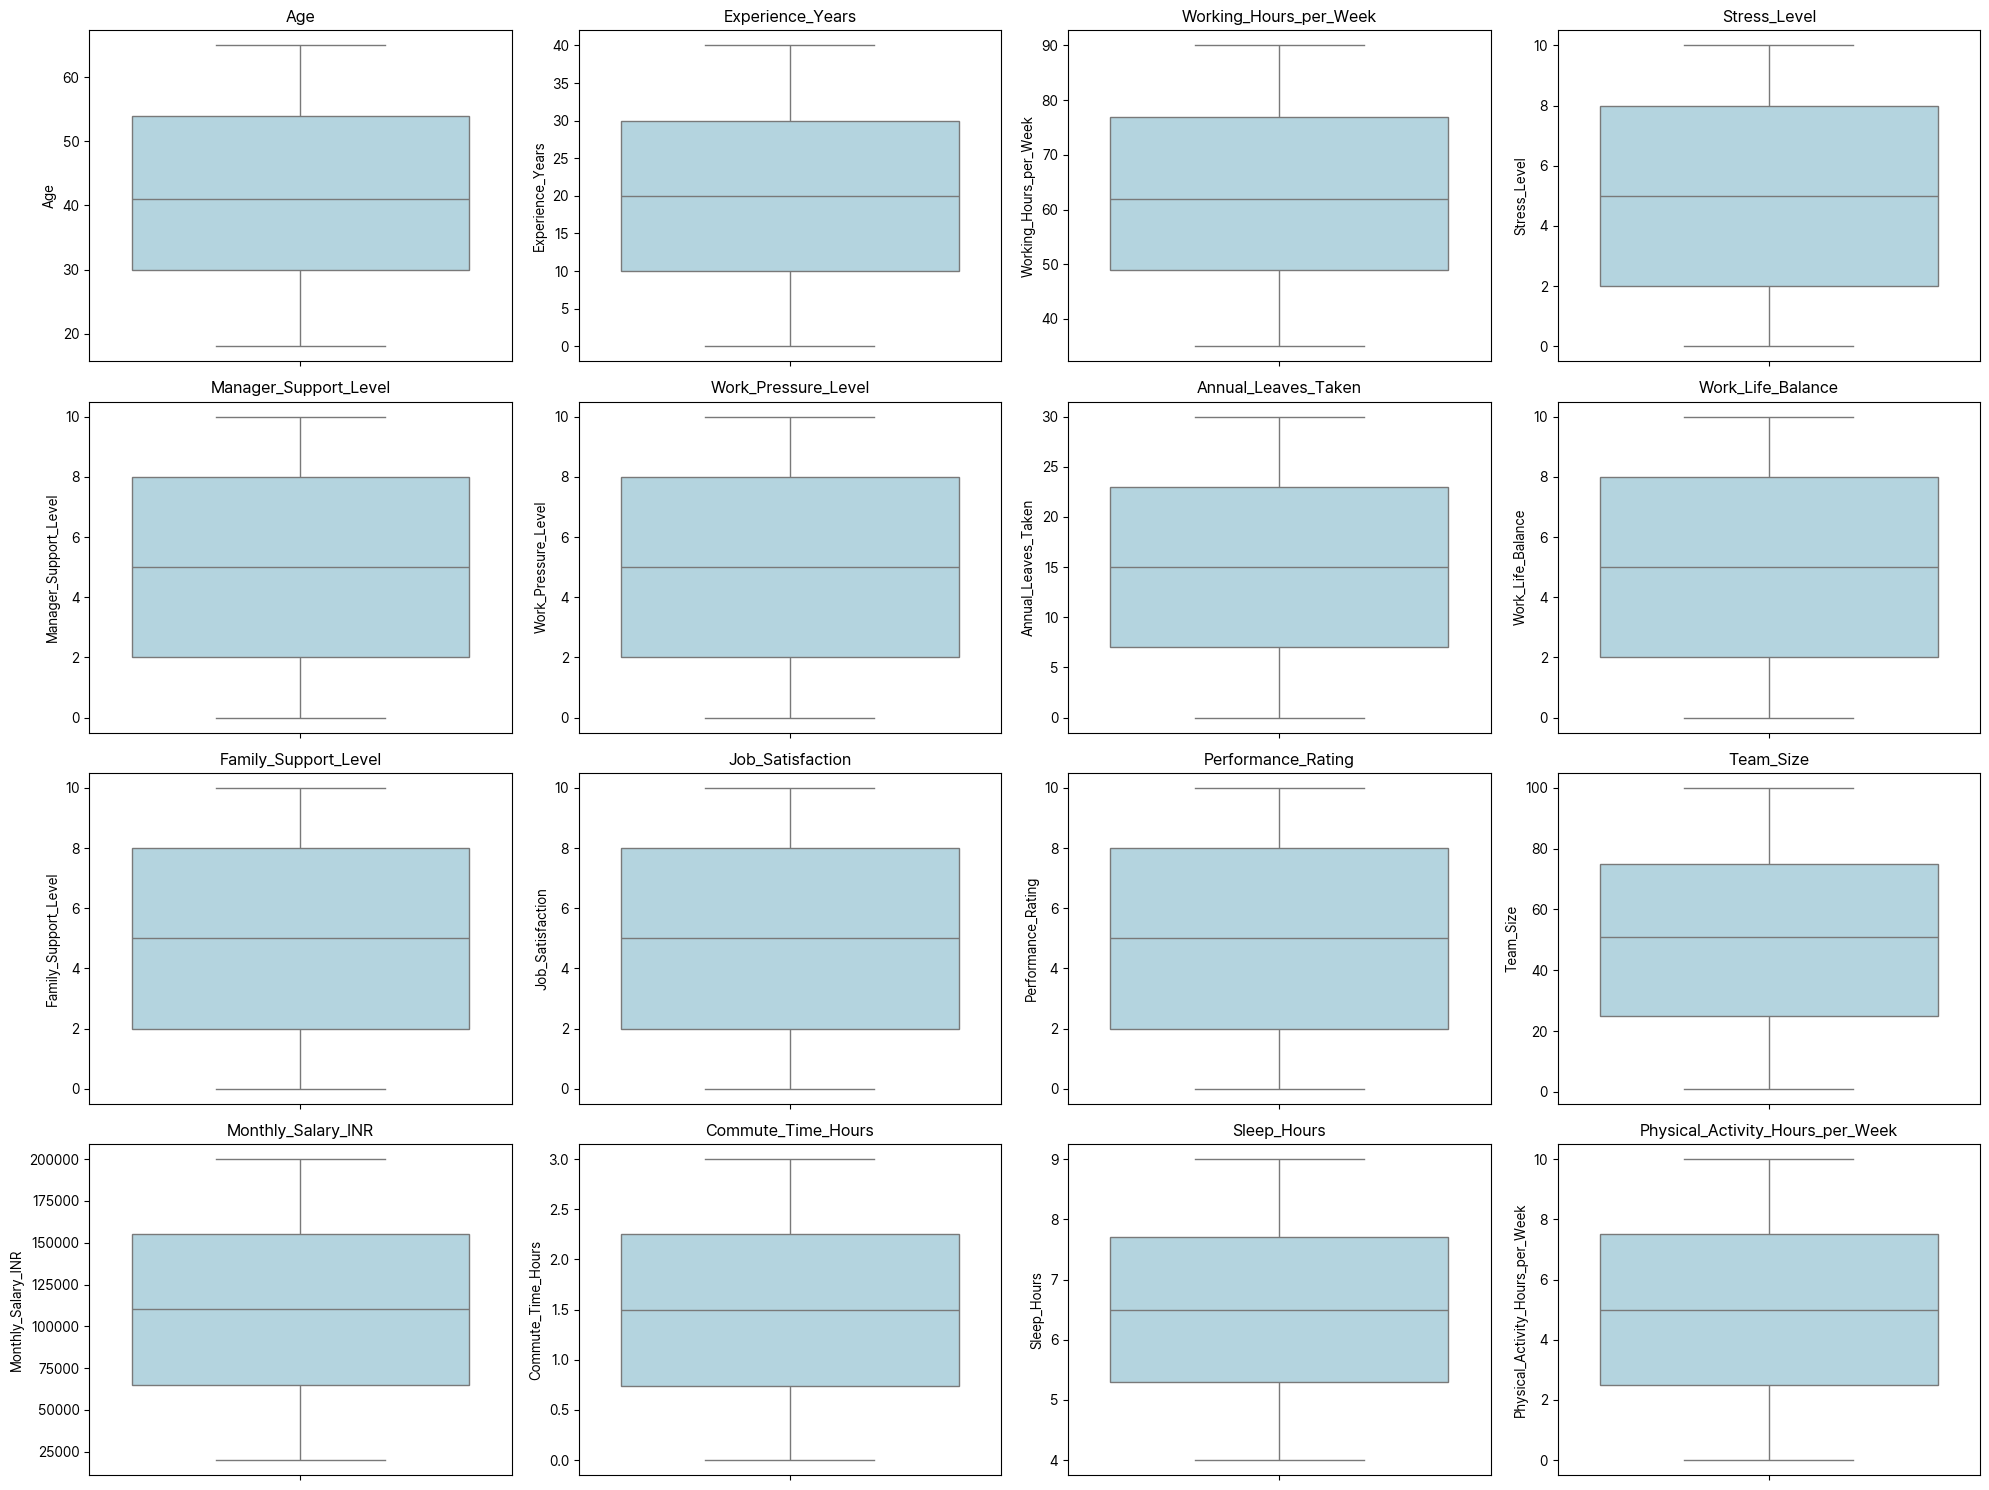

In [27]:
columns = [
    'Age', 'Experience_Years', 'Working_Hours_per_Week', 'Stress_Level',
    'Manager_Support_Level', 'Work_Pressure_Level', 'Annual_Leaves_Taken',
    'Work_Life_Balance', 'Family_Support_Level', 'Job_Satisfaction',
    'Performance_Rating', 'Team_Size', 'Monthly_Salary_INR',
    'Commute_Time_Hours', 'Sleep_Hours', 'Physical_Activity_Hours_per_Week'
]

# 박스플롯 그리기
plt.figure(figsize=(20, 15))
for i, column in enumerate(columns, 1):
    plt.subplot(4, 4, i)  
    sns.boxplot(data=df, y=column, color="lightblue")
    plt.title(column)
    plt.tight_layout()

plt.show()

* 수치형은 이상값이 없이 완벽

In [30]:
# value_counts 출력 함수
def display_value_counts(columns, dtype):
    for column in columns:
        print(f"Value counts for {column} ({dtype}):\n")
        print(df[column].value_counts(dropna=False))  # NaN 값도 포함해서 확인
        print("-" * 50)


boolean_columns = [
    'Remote_Work', 'Mental_Health_Leave_Taken', 'Training_Opportunities',
    'Gender_Bias_Experienced', 'Discrimination_Experienced'
]

# 불리언형 컬럼 value_counts
print("=== Boolean Columns ===")
display_value_counts(boolean_columns, "bool")

=== Boolean Columns ===
Value counts for Remote_Work (bool):

Remote_Work
True     25234
False    24766
Name: count, dtype: int64
--------------------------------------------------
Value counts for Mental_Health_Leave_Taken (bool):

Mental_Health_Leave_Taken
True     25075
False    24925
Name: count, dtype: int64
--------------------------------------------------
Value counts for Training_Opportunities (bool):

Training_Opportunities
False    25091
True     24909
Name: count, dtype: int64
--------------------------------------------------
Value counts for Gender_Bias_Experienced (bool):

Gender_Bias_Experienced
True     25155
False    24845
Name: count, dtype: int64
--------------------------------------------------
Value counts for Discrimination_Experienced (bool):

Discrimination_Experienced
False    25139
True     24861
Name: count, dtype: int64
--------------------------------------------------


In [31]:
object_columns = [
    'Gender', 'Marital_Status', 'Job_Role', 'Health_Issues',
    'Company_Size', 'Department', 'Burnout_Symptoms', 'Location'
]

# 객체형 컬럼 value_counts
print("\n=== Object Columns ===")
display_value_counts(object_columns, "object")


=== Object Columns ===
Value counts for Gender (object):

Gender
Female        16769
Male          16718
Non-Binary    16513
Name: count, dtype: int64
--------------------------------------------------
Value counts for Marital_Status (object):

Marital_Status
Single      12569
Divorced    12515
Married     12499
Widowed     12417
Name: count, dtype: int64
--------------------------------------------------
Value counts for Job_Role (object):

Job_Role
Manager      8465
Sales        8376
Developer    8368
Analyst      8335
HR           8274
Support      8182
Name: count, dtype: int64
--------------------------------------------------
Value counts for Health_Issues (object):

Health_Issues
Healthy     12541
Mental      12534
Both        12518
Physical    12407
Name: count, dtype: int64
--------------------------------------------------
Value counts for Company_Size (object):

Company_Size
Small     16836
Medium    16678
Large     16486
Name: count, dtype: int64
--------------------------

* 숫자형 데이터는 이상값으로 판단되는 데이터가 없다.
* 자료형 데이터의 경우 성별에 `Non-Binary`가 존재하는 경우 이외에 이상값으로 판단되는 값은 발견되지 않았다.

In [ ]:
# df로 호출시 전치리가 완료된 데이터 프레임형태로 사용가능
df